In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# the matplotlib inline allows you to display all graphs in Jupyter Notebooks
# the matplotlib.pyplot import allows you to manipulate plot, can use interface to generate plot

## Traffic Count
One of the last metrics of our project is the traffic accident count in the city. Traffic accidents cause humanity all kinds of lost, including prosperity and lives. When chosing neighborhoods, people tend to prefer those with less accidents rate.

In the nice neighborhoods, there must be thorough regulations and rulers' full attention on traffic control. As long as the governers perform their own jobs.

In [33]:
# create the initial read in file
traffic_count = pd.read_csv("CSVs/TrafficCountData.csv")

# display dataset
traffic_count.head(20)

,neighborhood,average_daily_car_traffic
0,Polish Hill,4949.0
1,Central Lawrenceville,NaN
2,Windgap,NaN
3,Squirrel Hill South,2741.0
4,Perry North,NaN
5,Central Northside,1046.0
6,Squirrel Hill North,NaN
7,Polish Hill,3015.0
8,Central Oakland,NaN
9,East Liberty,NaN


To determine the most satisfying neighborhoods according to their traffic counts, the simplest way is to compare through the whole dataset and rank the top neighborhoods with the least traffic accidents. So the new dataset trafficRank add up the traffic counts within the same neighborhoods and rank them from the least to the most.

In [39]:
# group data set to find out each neighborhood's average daily car traffic
traffic_count = traffic_count[["neighborhood", "average_daily_car_traffic"]]
traffic_count.head(20)

,neighborhood,average_daily_car_traffic
0,Polish Hill,4949.0
1,Central Lawrenceville,NaN
2,Windgap,NaN
3,Squirrel Hill South,2741.0
4,Perry North,NaN
5,Central Northside,1046.0
6,Squirrel Hill North,NaN
7,Polish Hill,3015.0
8,Central Oakland,NaN
9,East Liberty,NaN


In [36]:
# create a new data frame to arrange the neighborhoods according to averge daily car traffic counts
trafficRank = pd.DataFrame(traffic_count["neighborhood"].value_counts(ascending = True))

# display data frame
trafficRank.head(20)

,neighborhood
Spring Garden,1
West Oakland,1
Regent Square,1
New Homestead,1
Upper Lawrenceville,1
Swisshelm Park,1
Crafton Heights,1
Allegheny West,1
Allegheny Center,1
East Hills,1


<AxesSubplot:>

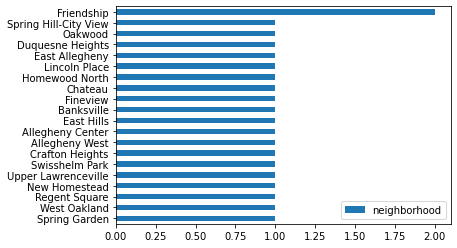

In [40]:
# display the data frame by plot graph
trafficRank.head(20).plot.barh()

Thus it can be declared that, according to the traffic counts, the best neighborhoods in Pitssburgh with the least traffic are:
1. Spring Garden
2. West Oakland
3. Regent Square
4. New Homestead
5. Upper Lawrenceville
6. Swisshelm Park
7. Crafton Heights
8. Allegheny West
9. Allegheny Center
10. East Hills
11. Banksville
12. Fineview
13. Chateau
14. Homewood North
15. Lincoln Place
16. East Allegheny
17. Duquesne Heights
18. Oakwood
19. Spring Hill-City View

regardless of appearance the order.

## Speed Hump
The second dataset for the last metric is the number of speed humps in the neighborhoods. Seepd humps are very useful tools when people are trying to control the vehicles' ground speed hence control the traffic. They play a significant role in traffic calming and increasing awareness on the road. Speed is the primary factor in most vehicle accidents—increasing both risk and severity. As drivers move faster, they have less time to respond to road conditions and any resulting collision causes more damage.

In [24]:
# create the initial read in file
speed_hump = pd.read_csv("CSVs/SpeedHumps.csv")

# display dataset
speed_hump.head(20)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


In [25]:
# add up all the speed humps in the same neighborhood and display
speed_hump.groupby("neighborhood").count()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,
Bloomfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Brookline,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Carrick,9,9,9,9,9,8,9,9,9,9,9,9,9,9,9
Central Oakland,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Garfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Highland Park,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Homewood South,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Mount Washington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
North Oakland,6,6,5,6,6,5,6,6,6,6,6,6,6,6,6


Since the speed humps ensure the car speed and driving safety, it can be infered that in the large developed neighborhoods drivers truely need more speed humps to control taffic than others. That is to say the number of speed humps in a neighborhood reflected the rate of cars ownerships and the quality of the residents' daily life.
So the new dataset humpRank add up the number of speed humps within the same neighborhoods and rank them from the most to the least.

In [19]:
# create a new data frame to arrange the neighborhoods according to the number of existing speed humps within. 
humpRank = pd.DataFrame(speed_hump["neighborhood"].value_counts(ascending = False))

# display data frame
humpRank.head(20)

,neighborhood
Squirrel Hill South,18
Carrick,9
Polish Hill,6
North Oakland,6
Upper Hill,4
South Side Slopes,4
Brookline,4
Perry North,4
Homewood South,4
Bloomfield,3


<AxesSubplot:>

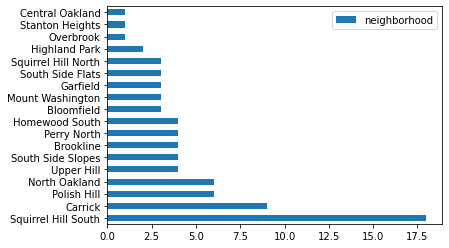

In [22]:
# display data frame in plot graph
humpRank.head(20).plot.barh()

Thus it can be declared that, according to the number of existing speed humps, the best neighborhoods in Pitssburgh with the most numebr of spped humps are:
1. Squirrel Hill South
2. Carrick
3. Polish hill
4. North Oakland
5. Upper Hill
6. South Side Slopes
7. Brookline
8. Perry North
9. Homewood South
10. Bloomfield
11. Mount Washington
12. Garfield
13. South Side Flats
14. Squirrel Hill North
15. Highland Park

# plotting

<AxesSubplot:>

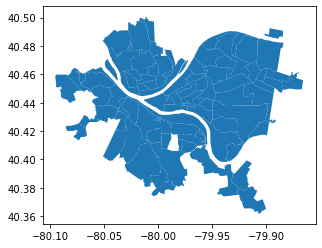

In [52]:
# create initial read in file
map_df = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
# crs for longitude and latitude
crs = "EPSG:4326"

# convert coordinate system to longitude and latitude
map_df = map_df.to_crs(crs)

#plotting the map of the shape file preview of the maps without data in it
map_df.plot()

In [41]:
# preview data
traffic_count.describe()

,average_daily_car_traffic
count,248.000000
mean,3341.455645
std,3254.394311
min,23.000000
25%,764.500000
50%,2259.000000
75%,5357.000000
max,16729.000000


<AxesSubplot:>

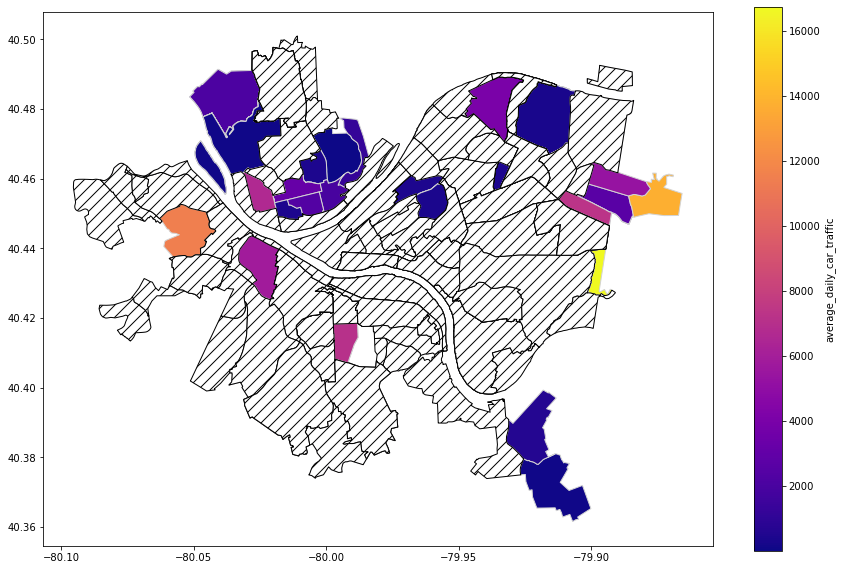

In [49]:
# merge the neighborhoods file for the map with crime rate data
traffic_count_map = map_df.merge(traffic_count, how = "left", left_on = "hood", 
                                right_on = "neighborhood") 

# display map
traffic_count_map.plot(column="average_daily_car_traffic",
               cmap = "plasma",
               edgecolor = "lightgrey", 
               legend = True,
               legend_kwds = {"label" : "average_daily_car_traffic"},
               missing_kwds = {
                         "color" : "white",
                         "edgecolor" : "black",
                         "hatch" : "//"},
               figsize = (15, 10)
              )